# Regeressão Linear Múltipla

Prevê a qualidade do vinho a partir da sua composição química.

Fonte: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


In [25]:
# Pandas: biblioteca para manipular a base de dados 
import pandas as pd 

# read_csv: método para ler a base de dados no formato csv 
qualidade_vinho = pd.read_csv("/content/winequality-red.csv") 

# visualização das primeiras linhas da base de dados 
qualidade_vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# Dados estatísticos
qualidade_vinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


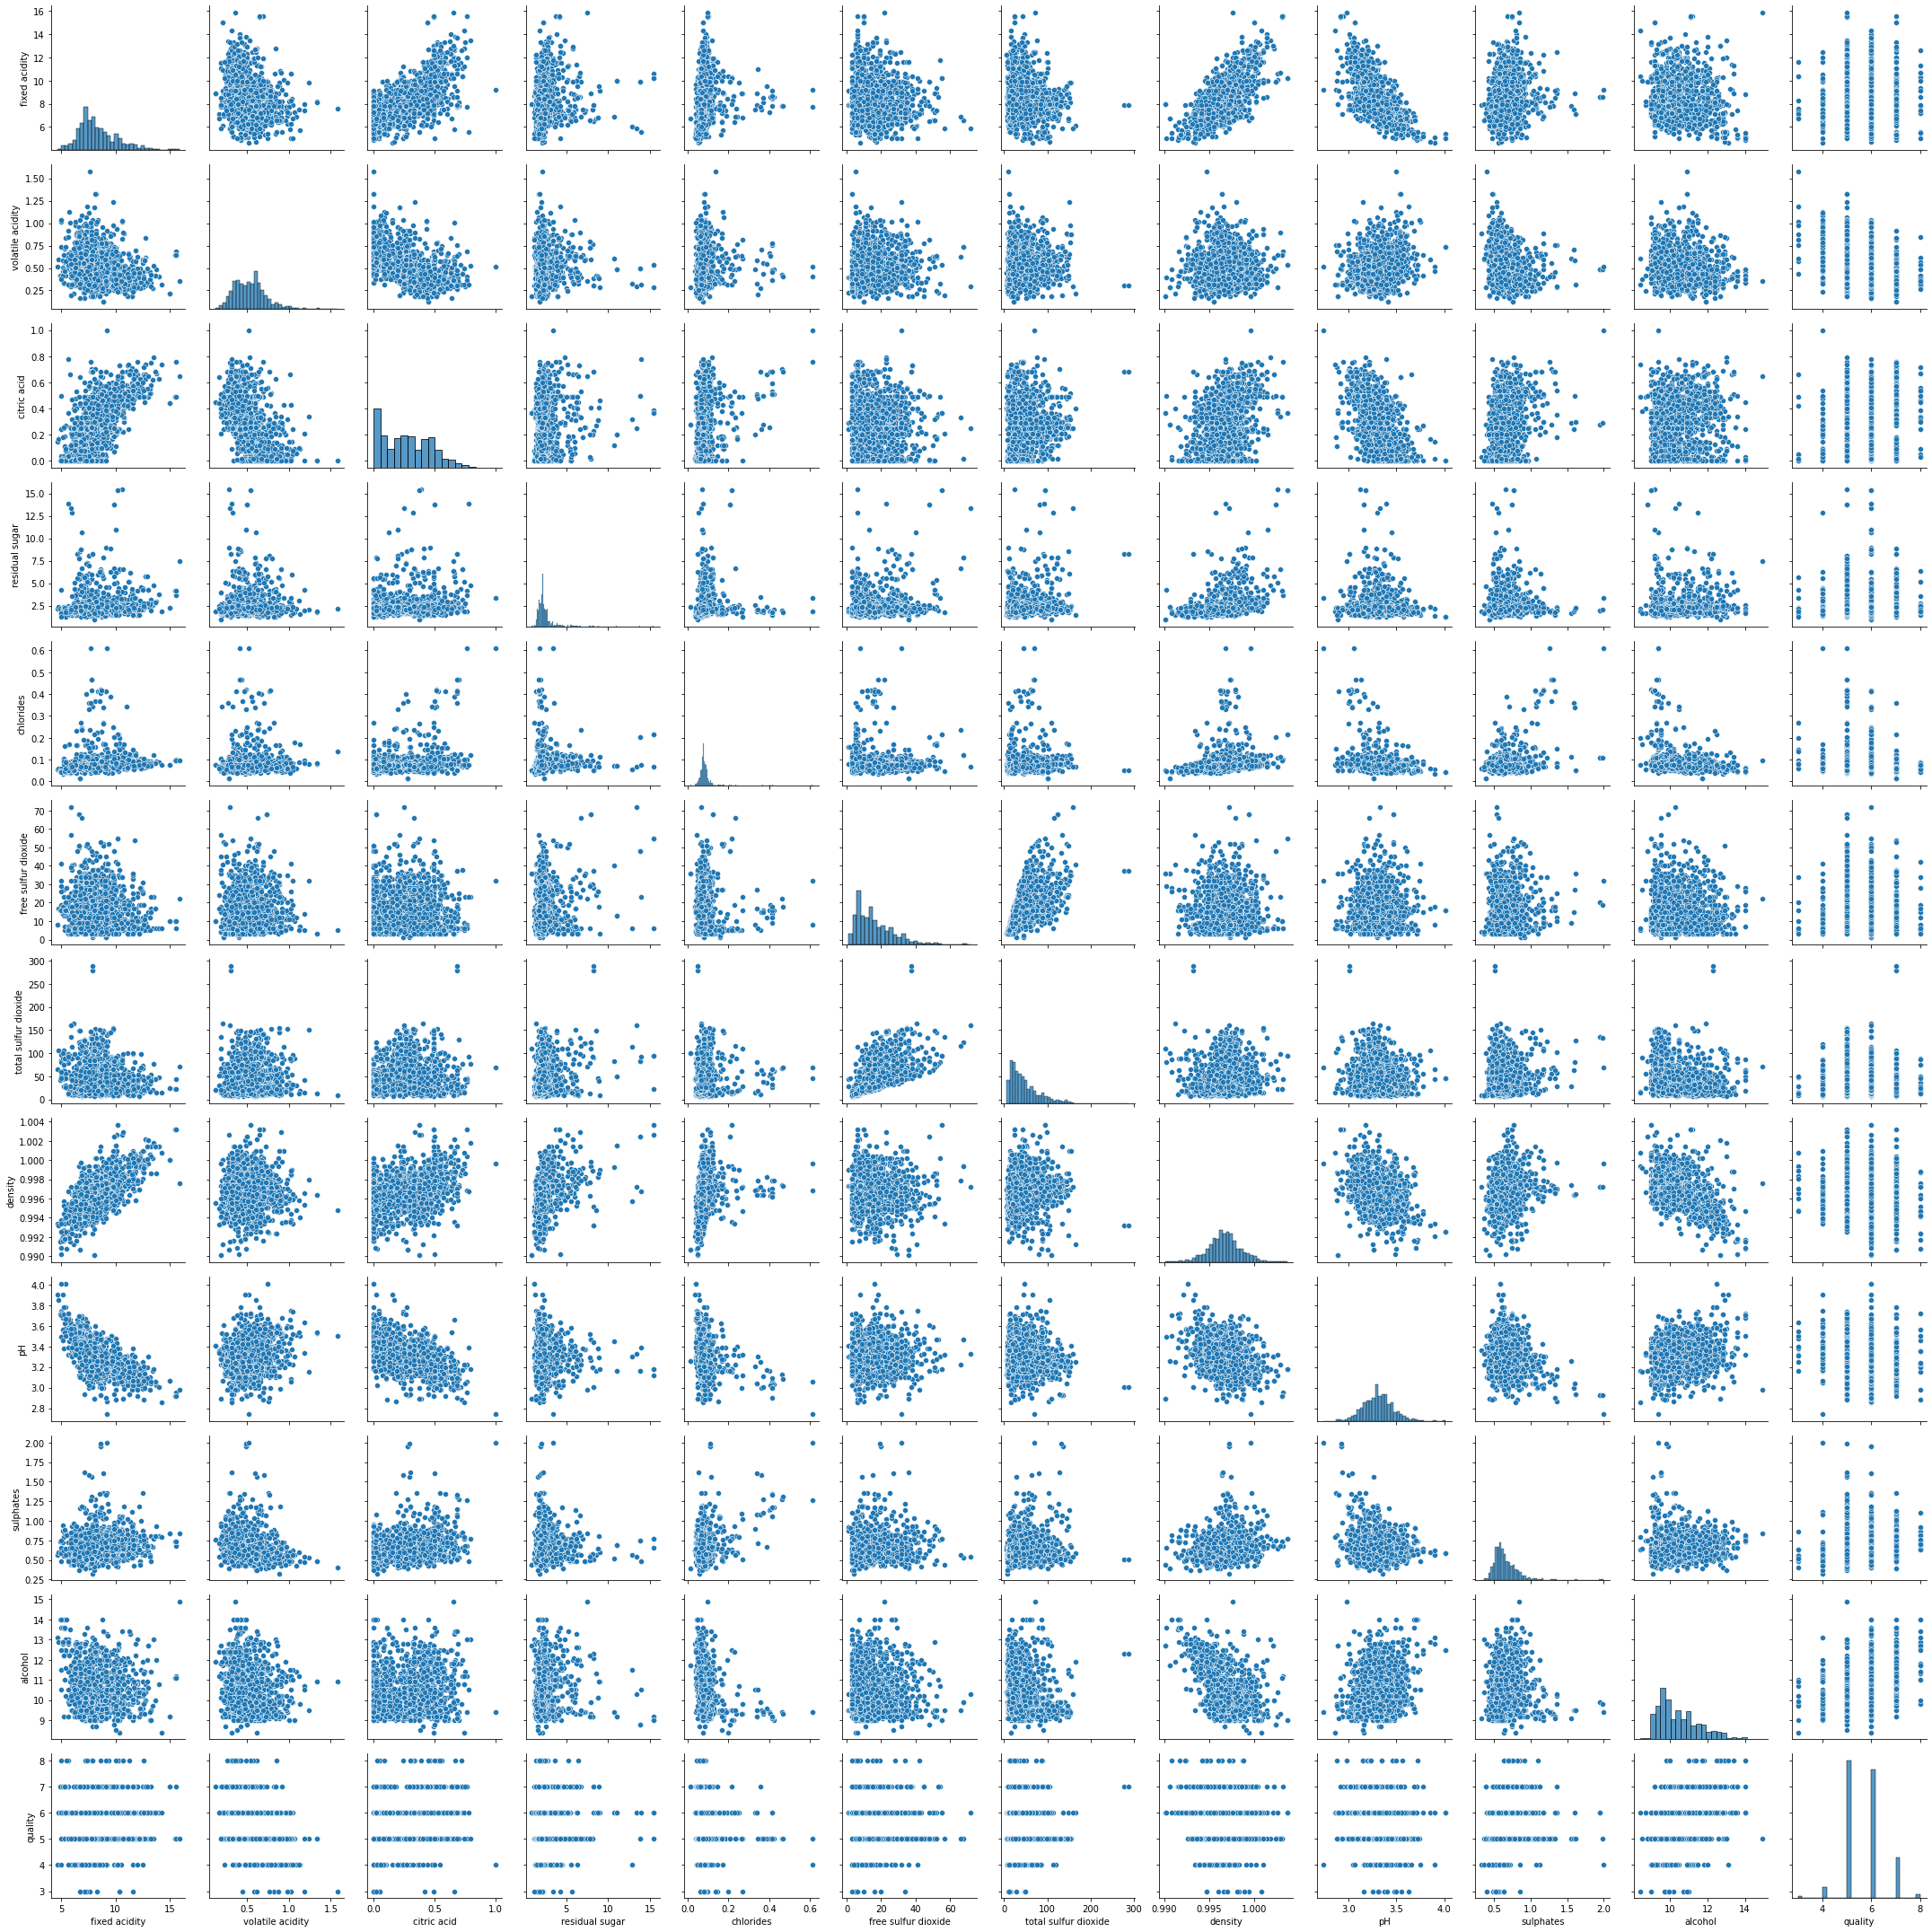

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Pairplot
# Permite uma análise visual correlação 
sns.pairplot(qualidade_vinho)
plt.tight_layout()

In [21]:
from sklearn.utils import shuffle


In [33]:
# Separa Entrada e Saída

Vinho = qualidade_vinho.drop('quality', axis=1).values
print(X)
Qualidade = qualidade_vinho['quality'].values
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


In [34]:
# Separa dados e treino e teste

from sklearn.model_selection import train_test_split
Vinho_treino, vinho_teste, Qualidade_treino, qualidade_teste = train_test_split(Vinho, Qualidade, test_size=0.3, random_state=42)

In [36]:
# Cria modelo e adequa aos dados
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Vinho_treino, Qualidade_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Calcula previsões
qualidade_prevista = reg.predict(vinho_teste)

In [41]:
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score


print("Mean squared error: %.2f"
      % mean_squared_error(qualidade_teste, qualidade_prevista))


Mean squared error: 0.41


In [42]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]


In [43]:
print('Variance score: %.2f' % r2_score(qualidade_teste, qualidade_prevista)) 

Variance score: 0.35
